Context
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

In [406]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [408]:
df=pd.read_csv("C:\\Users\\ssnan\\Downloads\\EasyVisa.csv")

In [410]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [412]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [414]:
df.shape

(25480, 12)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [418]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.043,1979.410,74455.815
std,22877.929,42.367,52815.942
min,-26.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270


In [420]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [422]:
cols=df.select_dtypes(["object"])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [424]:
for i in cols.columns:
    df[i]=df[i].astype("category")

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [428]:
df.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [430]:
df.drop(["case_id"],axis=1,inplace=True)

In [432]:
cols_cat = df.select_dtypes(["category"])


In [434]:
for i in cols_cat.columns:
    print("Unique values in",i,"are:")
    print(cols_cat[i].value_counts())
    print("*"*50)

Unique values in continent are:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are:
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are:
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are:
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
************

In [436]:
df['case_status'] = df['case_status'].map({'Denied': 1, 'Certified': 0})

In [438]:
#Univariate Analysis
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [440]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [442]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

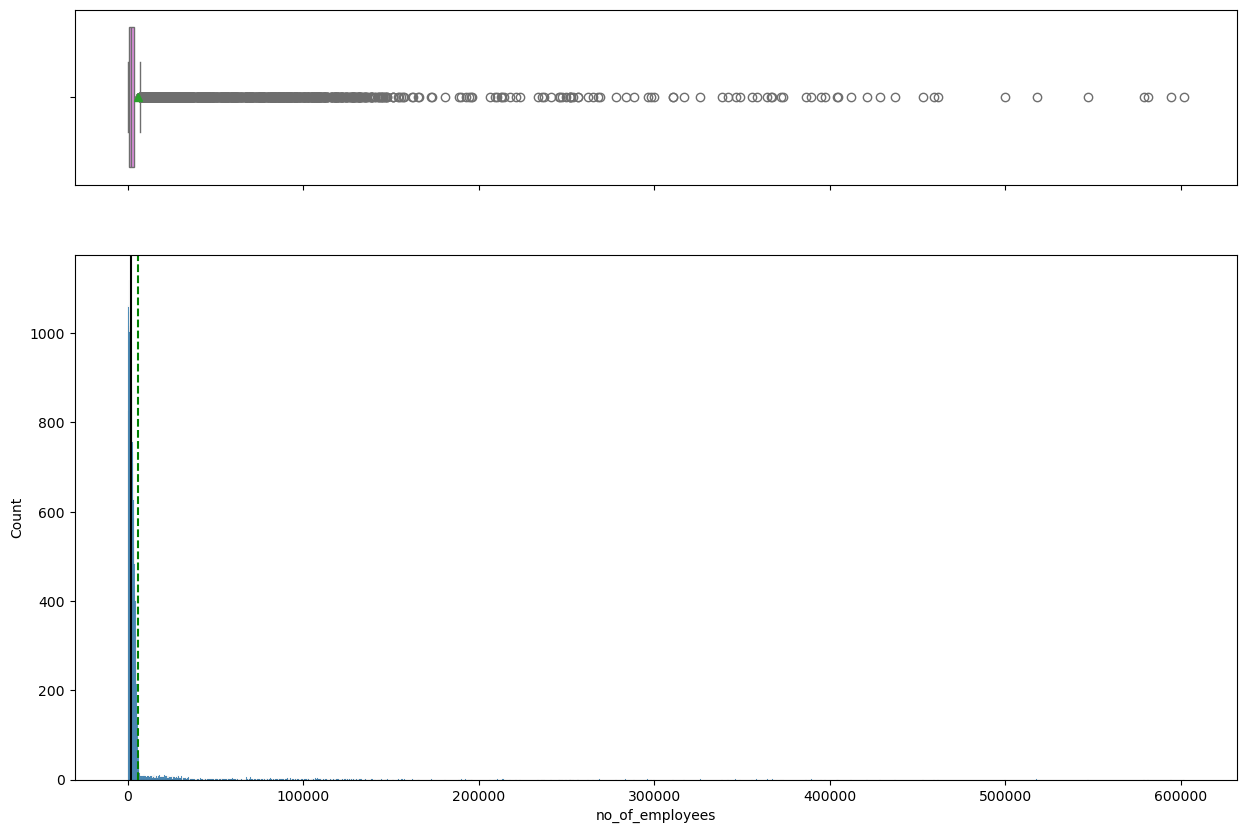

In [444]:
histogram_boxplot(df, "no_of_employees")

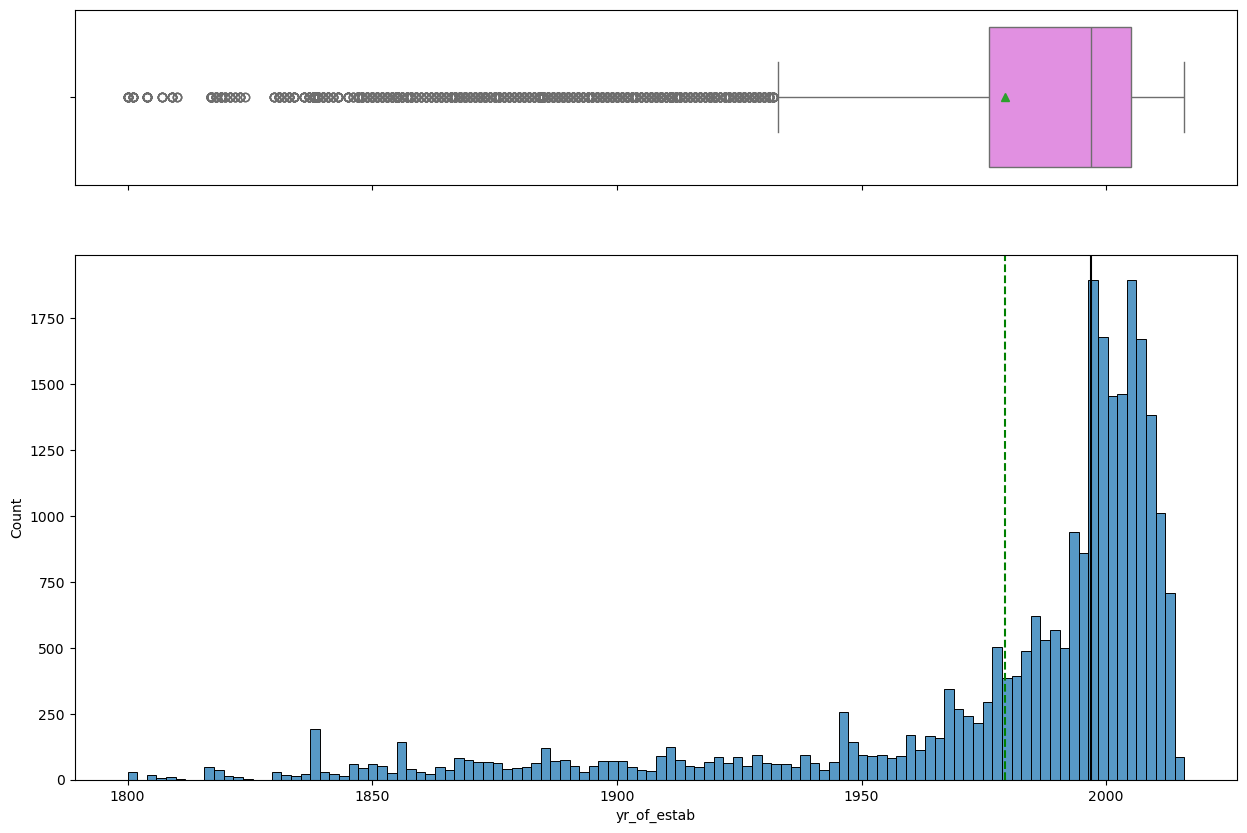

In [445]:
histogram_boxplot(df, "yr_of_estab")

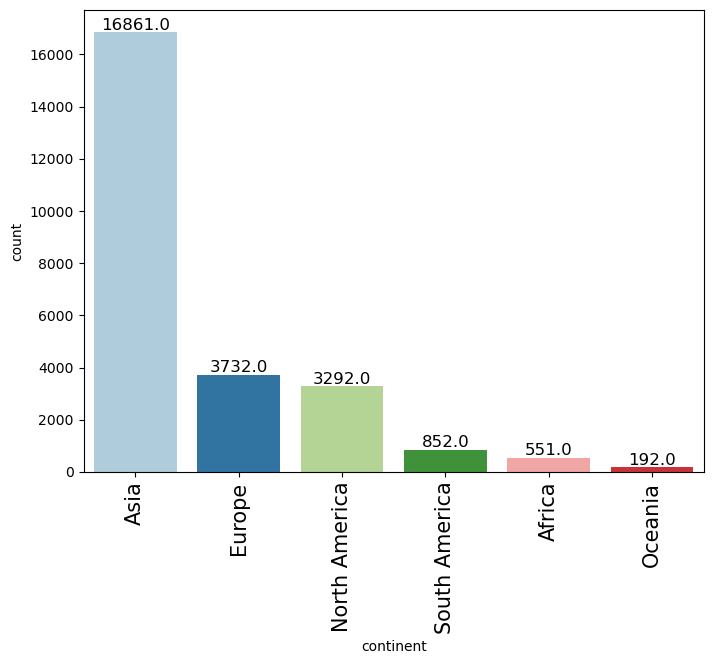

In [446]:
labeled_barplot(df, "continent")

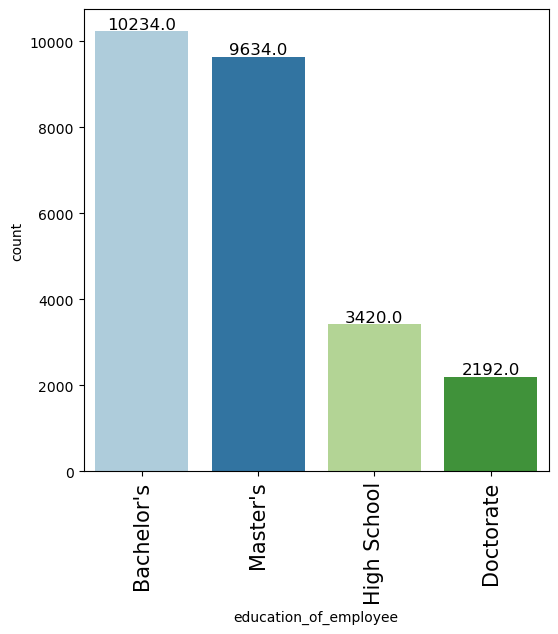

In [447]:
labeled_barplot(df, "education_of_employee")

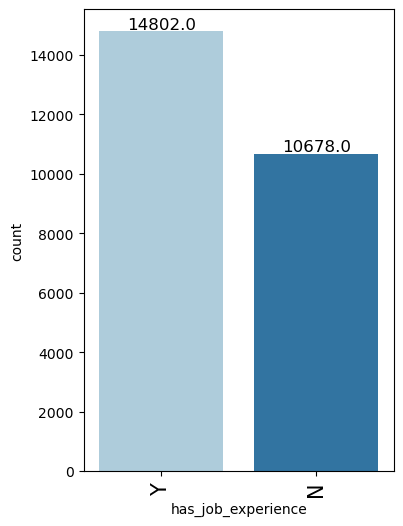

In [448]:
labeled_barplot(df, "has_job_experience")

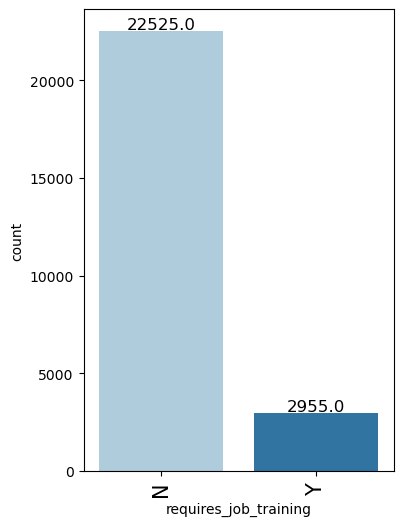

In [449]:
labeled_barplot(df, "requires_job_training")

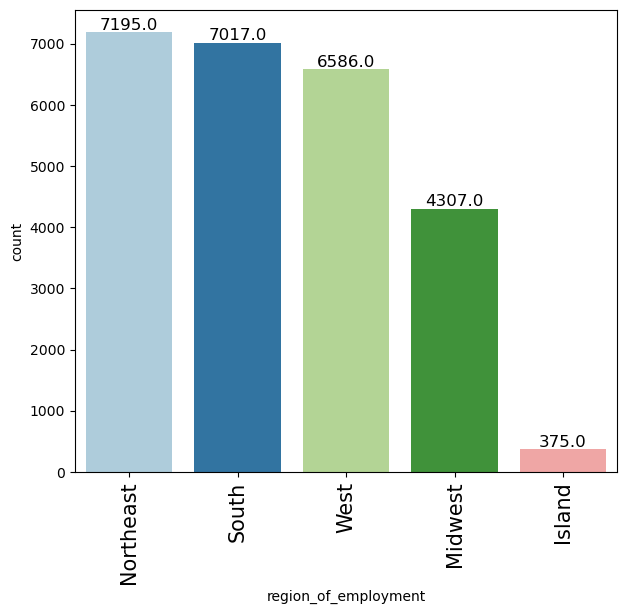

In [450]:
labeled_barplot(df, "region_of_employment")

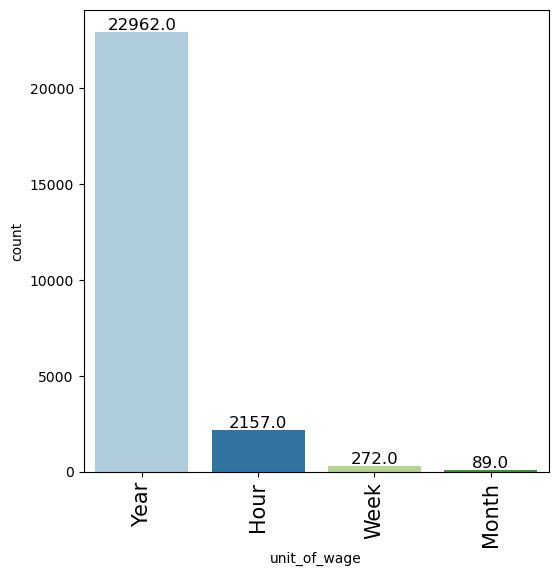

In [451]:
labeled_barplot(df, "unit_of_wage")

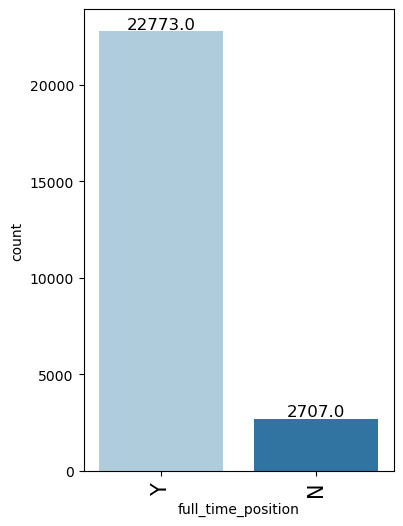

In [452]:
labeled_barplot(df, "full_time_position")

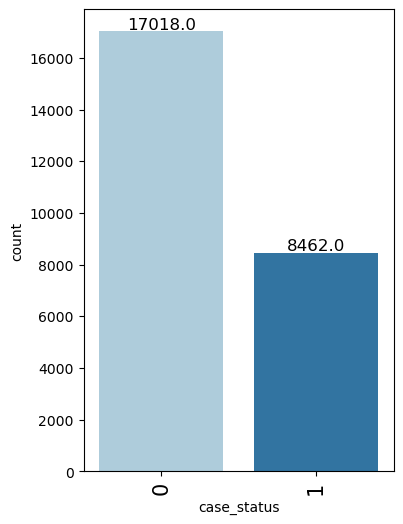

In [453]:
labeled_barplot(df, "case_status")

<Axes: xlabel='no_of_employees'>

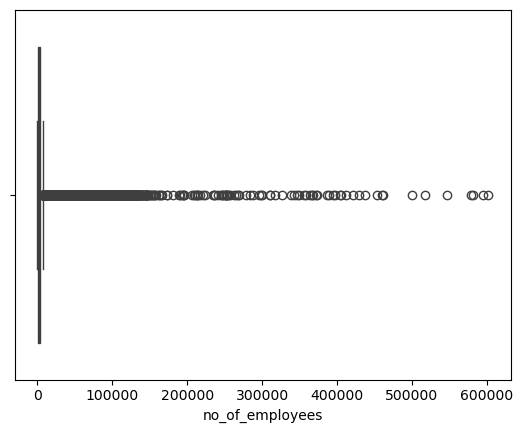

In [454]:
sns.boxplot(data=df,x="no_of_employees")

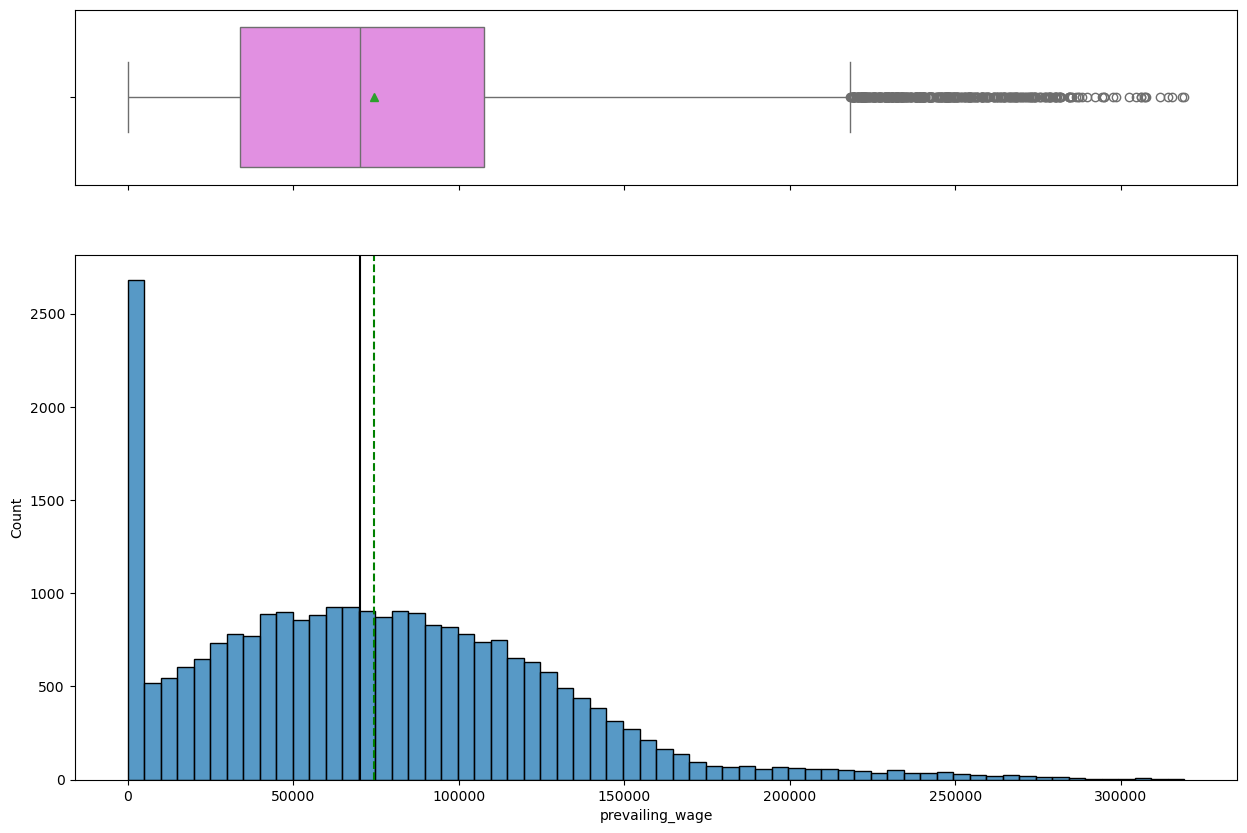

In [455]:
histogram_boxplot(df, "prevailing_wage")

In [456]:
#Bivariate Analysis


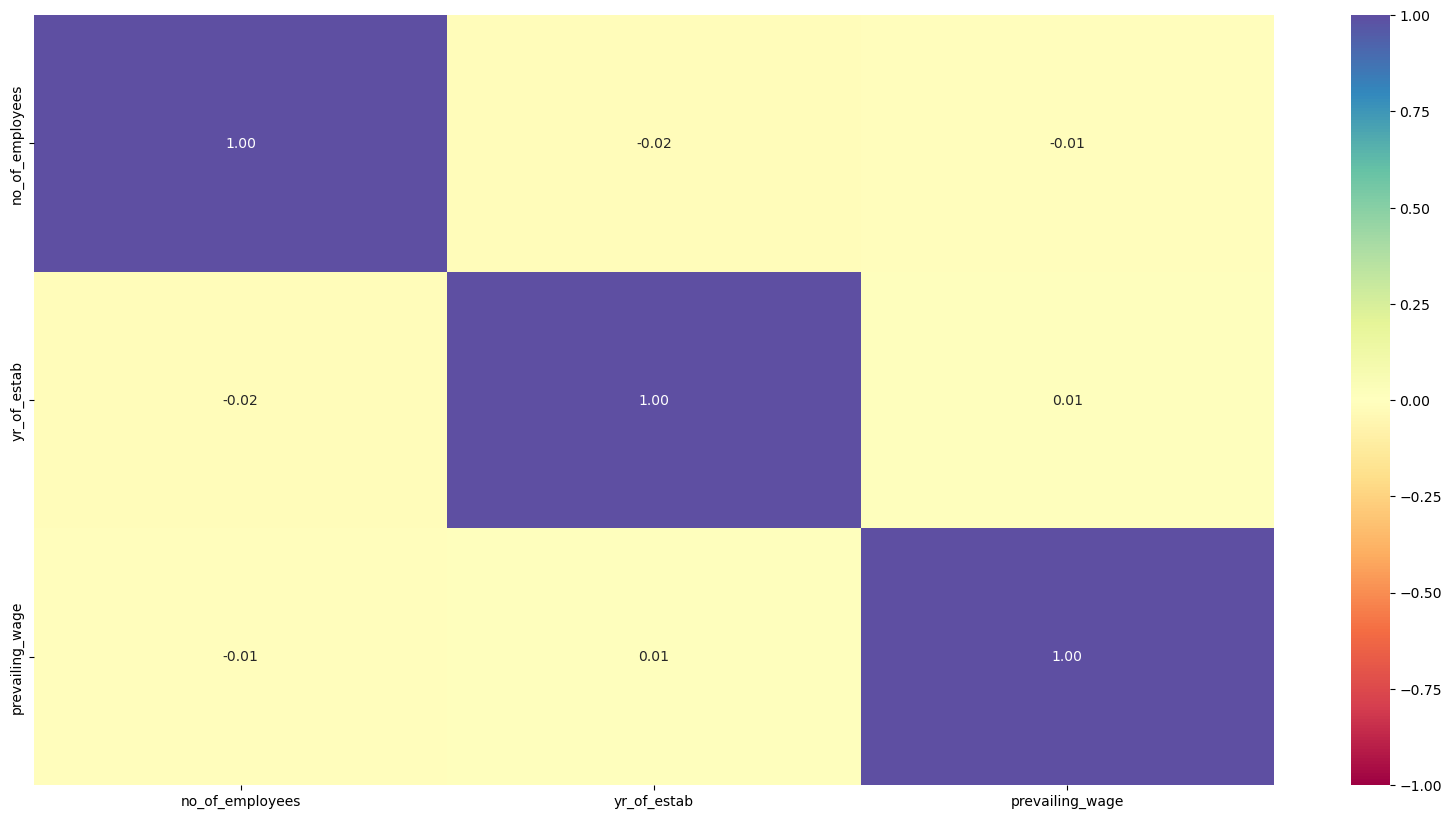

In [457]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

case_status        0     1    All
continent                        
All            17018  8462  25480
Asia           11012  5849  16861
North America   2037  1255   3292
Europe          2957   775   3732
South America    493   359    852
Africa           397   154    551
Oceania          122    70    192
------------------------------------------------------------------------------------------------------------------------


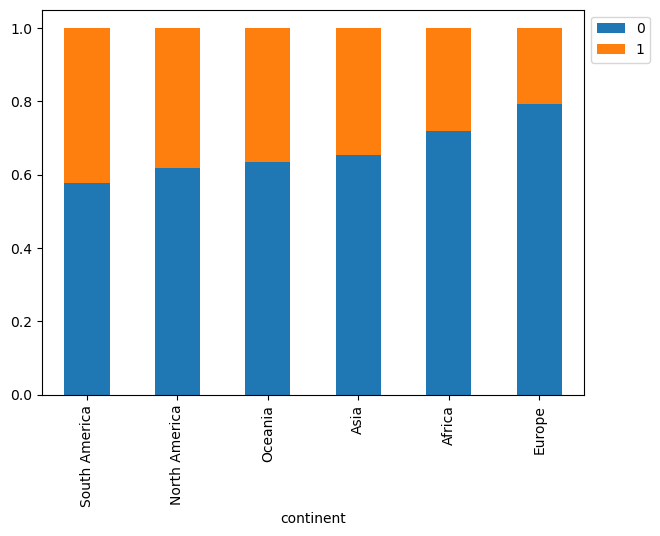

In [458]:
stacked_barplot(df, "continent", "case_status")

case_status                0     1    All
education_of_employee                    
All                    17018  8462  25480
Bachelor's              6367  3867  10234
High School             1164  2256   3420
Master's                7575  2059   9634
Doctorate               1912   280   2192
------------------------------------------------------------------------------------------------------------------------


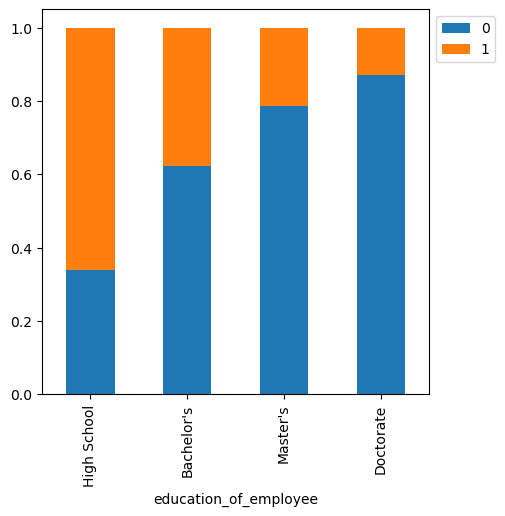

In [459]:
stacked_barplot(df, "education_of_employee", "case_status")

case_status             0     1    All
has_job_experience                    
All                 17018  8462  25480
N                    5994  4684  10678
Y                   11024  3778  14802
------------------------------------------------------------------------------------------------------------------------


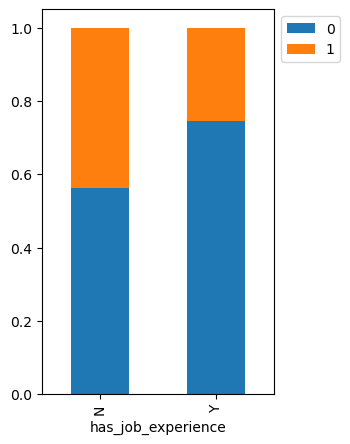

In [461]:
stacked_barplot(df, "has_job_experience", "case_status")

case_status                0     1    All
requires_job_training                    
All                    17018  8462  25480
N                      15012  7513  22525
Y                       2006   949   2955
------------------------------------------------------------------------------------------------------------------------


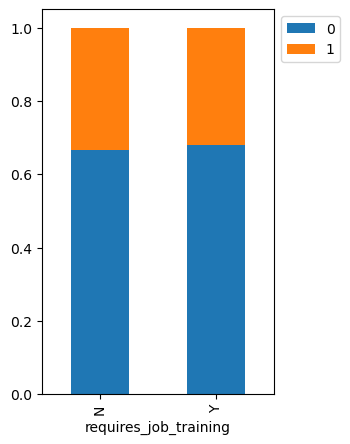

In [463]:
stacked_barplot(df, "requires_job_training", "case_status")

case_status               0     1    All
region_of_employment                    
All                   17018  8462  25480
Northeast              4526  2669   7195
West                   4100  2486   6586
South                  4913  2104   7017
Midwest                3253  1054   4307
Island                  226   149    375
------------------------------------------------------------------------------------------------------------------------


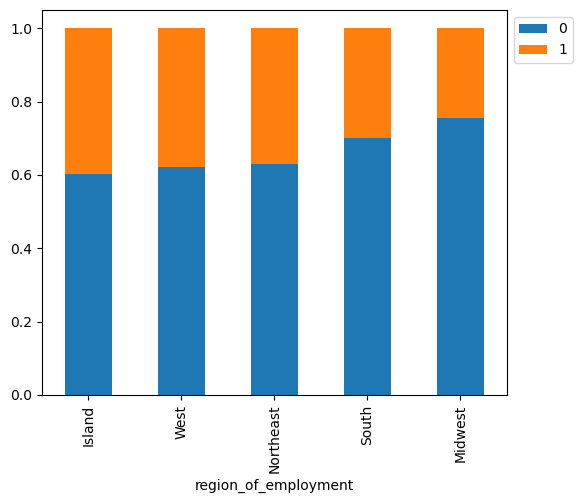

In [466]:
stacked_barplot(df, "region_of_employment", "case_status")

case_status       0     1    All
unit_of_wage                    
All           17018  8462  25480
Year          16047  6915  22962
Hour            747  1410   2157
Week            169   103    272
Month            55    34     89
------------------------------------------------------------------------------------------------------------------------


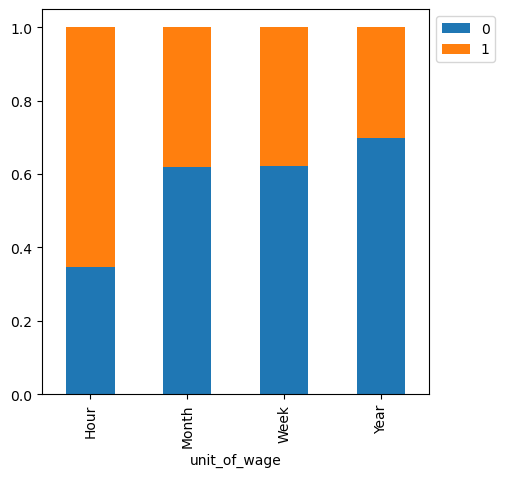

In [469]:
stacked_barplot(df, "unit_of_wage", "case_status")

case_status             0     1    All
full_time_position                    
All                 17018  8462  25480
Y                   15163  7610  22773
N                    1855   852   2707
------------------------------------------------------------------------------------------------------------------------


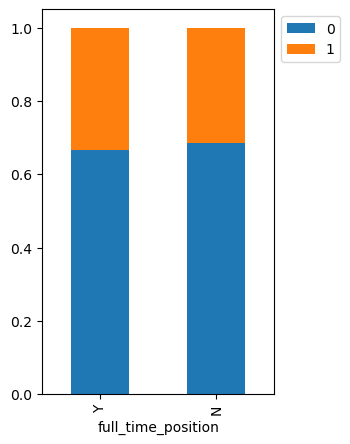

In [472]:
stacked_barplot(df, "full_time_position", "case_status")

<Axes: xlabel='prevailing_wage'>

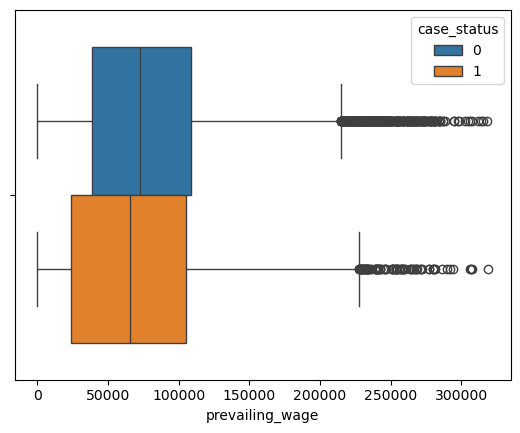

In [476]:
sns.boxplot(data=df,x="prevailing_wage",hue="case_status")

<Axes: xlabel='yr_of_estab'>

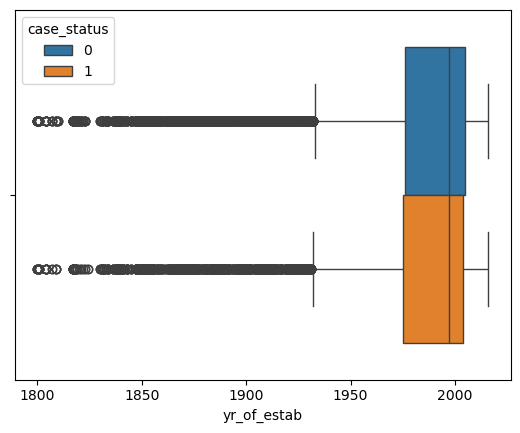

In [477]:
sns.boxplot(data=df,x="yr_of_estab",hue="case_status")

<Axes: xlabel='no_of_employees'>

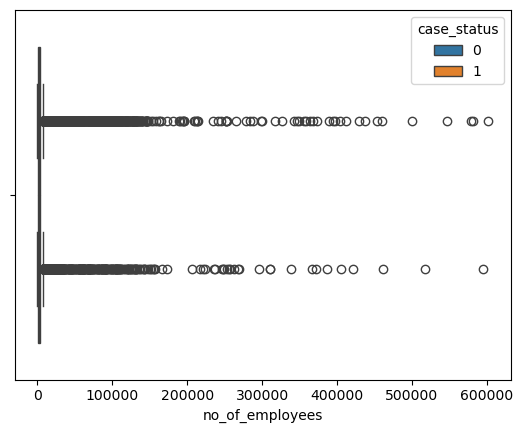

In [480]:
sns.boxplot(data=df,x="no_of_employees",hue="case_status")

In [483]:
df.no_of_employees.value_counts()

no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64

In [486]:
# Check for negative values in the column
has_negatives = (df['no_of_employees'] < 0).any()

# Print the result
if has_negatives:
    print("The feature contains negative values.")
else:
    print("The feature does not contain negative values.")


The feature contains negative values.


In [489]:
num_negatives = (df['no_of_employees'] < 0).sum()
print("Number of negative values: ",num_negatives)



Number of negative values:  33


In [491]:
median_value = np.median(df.loc[df['no_of_employees'] >= 0, 'no_of_employees'])

In [493]:
df['no_of_employees'] = np.where(df['no_of_employees'] < 0, median_value, df['no_of_employees'])


In [496]:
df.no_of_employees.describe()

count    25480.000
mean      5669.802
std      22877.372
min         12.000
25%       1028.000
50%       2112.000
75%       3504.000
max     602069.000
Name: no_of_employees, dtype: float64

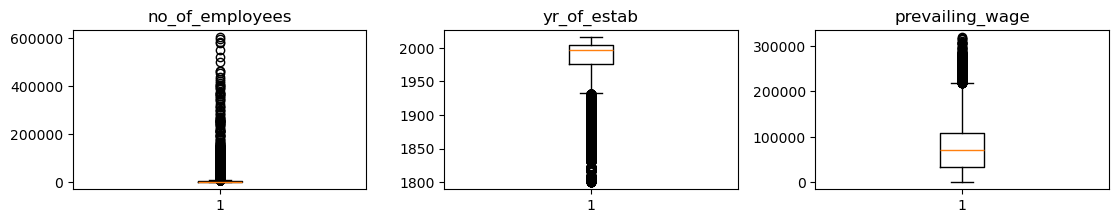

In [498]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [505]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

In [507]:
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [510]:
#splitting data into training,validationa and test sets
#first we will split into temporary and test sets

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [512]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


In [514]:
#creating dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [516]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [518]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [520]:
#Model Building

In [522]:

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [524]:
print(y_train.unique())  # To check unique class labels in y_train



[0, 1]
Categories (2, int64): [0, 1]


In [526]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9336222178451842
Random forest: 1.0
GBM: 0.4959621823911759
Adaboost: 0.4252511325585976
dtree: 1.0

Validation Performance:

Bagging: 0.44418192557590075
Random forest: 0.48434731246308327
GBM: 0.5044300059066745
Adaboost: 0.4477259303012404
dtree: 0.47430596574128764


In [527]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9336, Validation Score: 0.4442, Difference: 0.4894
Random forest: Training Score: 1.0000, Validation Score: 0.4843, Difference: 0.5157
GBM: Training Score: 0.4960, Validation Score: 0.5044, Difference: -0.0085
Adaboost: Training Score: 0.4253, Validation Score: 0.4477, Difference: -0.0225
dtree: Training Score: 1.0000, Validation Score: 0.4743, Difference: 0.5257


In [528]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5077
Before Oversampling, counts of label 'No': 10211 

After Oversampling, counts of label 'Yes': 10211
After Oversampling, counts of label 'No': 10211 

After Oversampling, the shape of train_X: (20422, 21)
After Oversampling, the shape of train_y: (20422,) 



In [529]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.973655861326021
Random forest: 1.0
GBM: 0.7279404563705807
Adaboost: 0.7075702673587307
dtree: 1.0

Validation Performance:

Bagging: 0.46958062610750145
Random forest: 0.522740696987596
GBM: 0.5451860602480804
Adaboost: 0.49793266391021856
dtree: 0.5115180153573539


In [530]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9737, Validation Score: 0.4696, Difference: 0.5041
Random forest: Training Score: 1.0000, Validation Score: 0.5227, Difference: 0.4773
GBM: Training Score: 0.7279, Validation Score: 0.5452, Difference: 0.1828
Adaboost: Training Score: 0.7076, Validation Score: 0.4979, Difference: 0.2096
dtree: Training Score: 1.0000, Validation Score: 0.5115, Difference: 0.4885


In [531]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [532]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5077
Before Under Sampling, counts of label 'No': 10211 

After Under Sampling, counts of label 'Yes': 5077
After Under Sampling, counts of label 'No': 5077 

After Under Sampling, the shape of train_X: (10154, 21)
After Under Sampling, the shape of train_y: (10154,) 



In [533]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9702580263935395
Random forest: 1.0
GBM: 0.7130194997045499
Adaboost: 0.677565491431948
dtree: 1.0

Validation Performance:

Bagging: 0.6237448316597756
Random forest: 0.6946249261665682
GBM: 0.715888954518606
Adaboost: 0.6893089190785587
dtree: 0.609568812758417


In [534]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9703, Validation Score: 0.6237, Difference: 0.3465
Random forest: Training Score: 1.0000, Validation Score: 0.6946, Difference: 0.3054
GBM: Training Score: 0.7130, Validation Score: 0.7159, Difference: -0.0029
Adaboost: Training Score: 0.6776, Validation Score: 0.6893, Difference: -0.0117
dtree: Training Score: 1.0000, Validation Score: 0.6096, Difference: 0.3904


In [368]:
#Hyperparameter tuning

In [370]:
#tuning gbm with undersampled data
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

UsageError: Line magic function `%%time` not found.


In [538]:
import time

# Record the start time
start_time = time.time()

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Record the end time and calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}")
print(f"Execution Time: {execution_time} seconds")


Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.6984426515651061
Execution Time: 46.42156100273132 seconds


In [539]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [540]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.703,0.656,0.725,0.689


In [542]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.714,0.680,0.558,0.613


In [543]:
#tuning gbm with oversampling

In [547]:
import time

# Record the start time
start_time = time.time()

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Record the end time and calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}")
print(f"Execution Time: {execution_time} seconds")

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.2, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.7183636535351836
Execution Time: 49.97436881065369 seconds


In [548]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [558]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.796,0.736,0.836,0.783


In [560]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.732,0.524,0.614,0.565


In [562]:
#tuning adaboost with undersampled

In [564]:
import time

# Record the start time
start_time = time.time()
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

Best parameters are {'n_estimators': 30, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7360684224816726:
Execution Time: 5.429027080535889 seconds


In [565]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [566]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.690,0.579,0.745,0.652


In [567]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.722,0.613,0.577,0.595


In [568]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.703,0.796,0.690
Recall,0.656,0.736,0.579
Precision,0.725,0.836,0.745
F1,0.689,0.783,0.652


In [570]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.714,0.732,0.722
Recall,0.680,0.524,0.613
Precision,0.558,0.614,0.577
F1,0.613,0.565,0.595


In [576]:
# Let's check the performance on test set
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.730,0.686,0.578,0.627


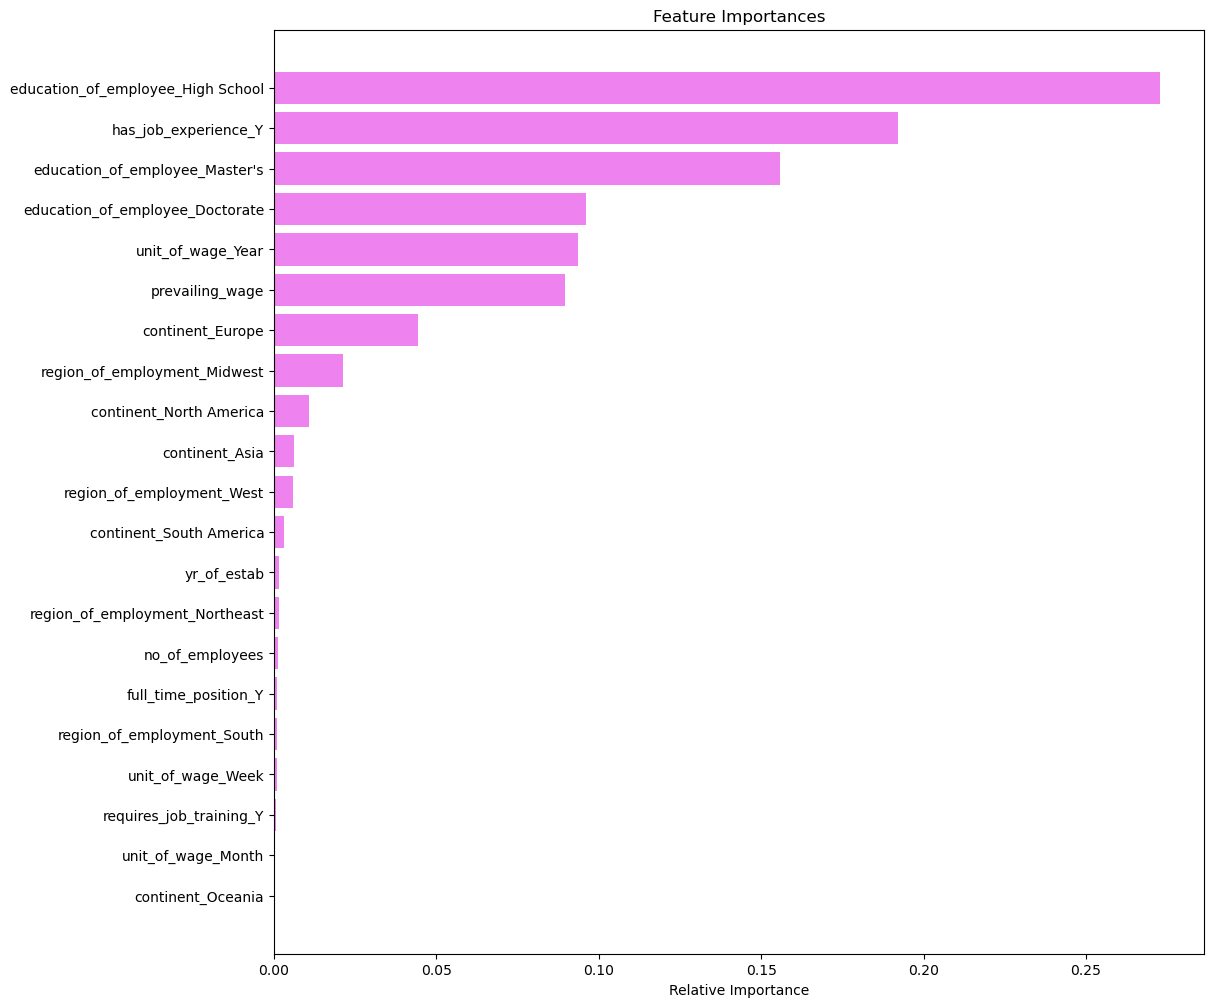

In [578]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()